<a href="https://colab.research.google.com/github/LorenzoDonatti/TCC_MachineLearning_VLC/blob/main/Final_OOK_80_FullDataset_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMOS DE DEEP LEARNING EM DATASETS DE COMUNICAÇÃO POR LUZ VISIVEL**

---


TRABALHO DE CONCLUSÃO DE CURSO DO ALUNO LORENZO MOREIRA DONATTI.

# Importação de Bibliotecas e Download da Pasta no Drive

---
Como o dataset foi baixado no GDrive, é possível baixar a pasta completa pela biblioteca gdown.
Ela ainda fornece como saída, os diretórios de todos arquivos baixados (guardar em variavel)


In [ ]:
!pip install -U --no-cache-dir gdown --pre

#MANIPULAÇÃO
import numpy as np
import pandas as pd

#DOWNLOAD E ABERTURA
import gdown
from scipy.io import loadmat

#FILTRO
from scipy.ndimage import gaussian_filter1d

#PRE PROCESSAMENTO E METRICAS
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#MODELOS DE MACHINE LEARNING
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#VISUALIZAÇÃO
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
teste = "https://drive.google.com/drive/folders/1Hu6JsnLbPBjOJWLy4j1xMsr3XHnShzrN?usp=share_link"
output = gdown.download_folder(teste, quiet=True)

output

['/content/80/0cm.mat',
 '/content/80/5cm.mat',
 '/content/80/10cm.mat',
 '/content/80/15cm.mat',
 '/content/80/20cm.mat',
 '/content/80/25cm.mat',
 '/content/80/30cm.mat',
 '/content/80/35cm.mat',
 '/content/80/40cm.mat',
 '/content/80/45cm.mat',
 '/content/80/50cm.mat',
 '/content/80/55cm.mat',
 '/content/80/60cm.mat',
 '/content/80/65cm.mat',
 '/content/80/70cm.mat',
 '/content/80/75cm.mat',
 '/content/80/80cm.mat',
 '/content/80/85cm.mat',
 '/content/80/90cm.mat',
 '/content/80/95cm.mat',
 '/content/80/100cm.mat',
 '/content/80/105cm.mat',
 '/content/80/110cm.mat',
 '/content/80/115cm.mat',
 '/content/80/120cm.mat',
 '/content/80/125cm.mat',
 '/content/80/130cm.mat',
 '/content/80/135cm.mat',
 '/content/80/140cm.mat',
 '/content/80/145cm.mat',
 '/content/80/150cm.mat',
 '/content/80/155cm.mat',
 '/content/80/160cm.mat',
 '/content/80/165cm.mat',
 '/content/80/170cm.mat',
 '/content/80/175cm.mat',
 '/content/80/180cm.mat',
 '/content/80/label.mat']

# Abrindo arquivos .mat e identificando seu cabeçalho

---



Para a abertura de arquivos .mat foi necessário o módulo loadmat da biblioteca scipy.io. A função retorna um dicionário com diferentes Headers, onde apenas o ultimo será utilizado. 

Como todos arquivos da pasta serão abertos, o conteúdo de cada arquivo será guardado em uma posição de uma lista.

Os labels (saida y) estarão na ultima posição da lista 

In [ ]:
########### ESSE PROCESSO É SUBSTITUIDO###########
exemplo = loadmat('/content/80/label.mat')
print(exemplo)

exemplo = exemplo['org_label']
print(exemplo)

########### POR ESSE PROCESSO ################
exemplo_otim = loadmat('/content/80/label.mat')
exemplo_otim = exemplo_otim[list(exemplo_otim.keys())[-1]]
print(exemplo_otim)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Jul 24 21:19:25 2018', '__version__': '1.0', '__globals__': [], 'org_label': array([[1, 0, 1, ..., 1, 1, 1]], dtype=uint8)}
[[1 0 1 ... 1 1 1]]
[[1 0 1 ... 1 1 1]]


In [ ]:
datas = []
for o in output:
  data_test = loadmat(o)
  data_test = data_test[list(data_test.keys())[-1]]
  datas.append(data_test)

print(datas[-1], datas[0])

[[1 0 1 ... 1 1 1]] [[0.32835821 0.34328358 0.32835821 ... 0.26984127 0.28571429 0.28571429]
 [0.34328358 0.35820896 0.34328358 ... 0.31746032 0.3015873  0.31746032]
 [0.35820896 0.34328358 0.35820896 ... 0.33333333 0.33333333 0.33333333]
 ...
 [0.35820896 0.25373134 0.32835821 ... 0.22222222 0.23809524 0.28571429]
 [0.34328358 0.28358209 0.34328358 ... 0.25396825 0.23809524 0.31746032]
 [0.32835821 0.29850746 0.34328358 ... 0.26984127 0.28571429 0.28571429]]


# Preparação dos dados e Codificação dos valores Numéricos

---
É necessário codificar os dados em duas situações, quando forem categóricos (não numéricos) e quando estiverem com valores numéricos diferentes do escopo entre 0 e 1, a biblioteca sklearn fornece duas funções de fácil utilização e bem otimizadas.

Basicamente é feito um casting para int e após uma normalização dos dados.

Além disso, os dados do dataset vêm com o shape (1,x), e nosso modelo de machine learning somente aceitará vetores como parâmetro de saída, sendo necessário Transpor nossa estrutura.

Também, a função flatten é necessária para transformar a estrutura em um vetor de 1D.



In [ ]:
print("Formatos originais dos dados: \n", datas[-1].shape, datas[0].shape, type(datas[-1]))

print("\nFormatos Transpostos dos dados: \n", datas[-1].T.shape, datas[0].T.shape)

print("\nUtilização do flatten: \n", datas[-1].flatten().shape)

print("\nDados sem flatten: \n", datas[-1].T, "\nDados com flatten: \n", datas[-1].flatten())

Formatos originais dos dados: 
 (1, 18000) (80, 18000) <class 'numpy.ndarray'>

Formatos Transpostos dos dados: 
 (18000, 1) (18000, 80)

Utilização do flatten: 
 (18000,)

Dados sem flatten: 
 [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]] 
Dados com flatten: 
 [1 0 1 ... 1 1 1]


[1 0 1 0 1]


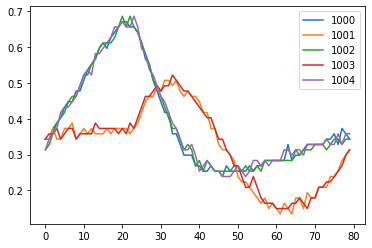

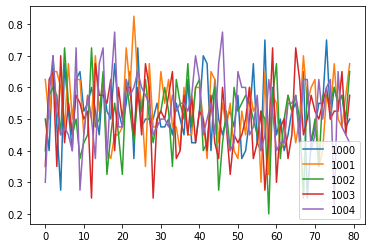

In [ ]:
df0 = pd.DataFrame(datas[0])
df30 = pd.DataFrame(datas[35])

df0.iloc[:,1000:1005].plot()
df30.iloc[:,1000:1005].plot()

print(datas[-1][0][1000:1005])

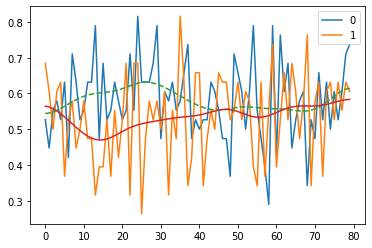

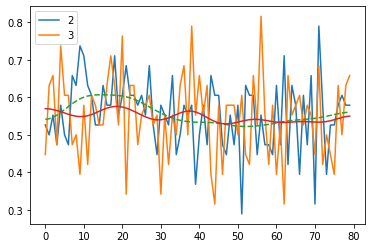

In [ ]:
x1_0 = df30.iloc[:,0]
x1_2 = df30.iloc[:,2]

x0_1 = df30.iloc[:,1]
x0_3 = df30.iloc[:,3]

y1_3_0 = gaussian_filter1d(x1_0, 5)
y1_3_2 = gaussian_filter1d(x1_2, 5)
y0_3_1 = gaussian_filter1d(x0_1, 5)
y0_3_3 = gaussian_filter1d(x0_3, 5)

df30.iloc[:,:2].plot()
plt.plot(y1_3_0, '--')
plt.plot(y0_3_1)

plt.show()

df30.iloc[:,2:4].plot()
plt.plot(y1_3_2, '--')
plt.plot(y0_3_3)

plt.show()

In [ ]:
lab = preprocessing.LabelEncoder()
y_transf = lab.fit_transform(datas[-1].flatten())

In [ ]:
teste_Xtrain = []
teste_Ytrain = []

teste_Xtest = []
teste_Ytest = []

i=0
for data in datas[:-1]:
  X_train, X_test, y_train, y_test  = train_test_split(data.T, y_transf, test_size=0.33, random_state=0)

  teste_Xtrain.append(X_train)
  teste_Xtest.append(X_test)

  teste_Ytrain.append(y_train)
  teste_Ytest.append(y_test)
  i = i+1

X_train = np.reshape(teste_Xtrain, (teste_Xtrain[0].shape[0]*i, teste_Xtrain[0].shape[1]))
X_train_Gauss = gaussian_filter1d(X_train, 3)

y_train = np.reshape(teste_Ytrain, (teste_Ytrain[0].shape[0]*i))

# DECISION TREE

---



In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_Gauss = DecisionTreeClassifier()
clf_Gauss.fit(X_train_Gauss, y_train)

i=0
distancia = []
acur_DT = []
acur_DT_Gauss = []
for j in range(len(teste_Xtest)):
  X_test_Gauss = gaussian_filter1d(teste_Xtest[j],3)

  y_pred = clf.predict(teste_Xtest[j])
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  acur_DT.append(accuracy_score(teste_Ytest[j], y_pred)*100)
  acur_DT_Gauss.append(accuracy_score(teste_Ytest[j], y_pred_Gauss)*100)
  distancia.append(i)
  i = i + 5

#import matplotlib.pyplot as plt
#plt.plot(distancia,acur_DT) 
#plt.plot(distancia,acur_DT_Gauss,'.')

# **RANDOM FOREST**

---



In [ ]:
clf = RandomForestClassifier(criterion='entropy',n_estimators=25, n_jobs=-1)
clf.fit(X_train, y_train)

clf_Gauss = RandomForestClassifier(criterion='entropy',n_estimators=25, n_jobs=-1)
clf_Gauss.fit(X_train_Gauss, y_train)

i=0
distancia = []
acur_RF = []
acur_RF_Gauss = []
for j in range(len(teste_Xtest)):
  X_test_Gauss = gaussian_filter1d(teste_Xtest[j],3)

  y_pred = clf.predict(teste_Xtest[j])
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  acur_RF.append(accuracy_score(teste_Ytest[j], y_pred)*100)
  acur_RF_Gauss.append(accuracy_score(teste_Ytest[j], y_pred_Gauss)*100)
  distancia.append(i)
  i = i + 5

#import matplotlib.pyplot as plt
#plt.plot(distancia,acur_RF) 
#plt.plot(distancia,acur_RF_Gauss,'.')

# GRADIENT BOOST

---



In [ ]:
clf = GradientBoostingClassifier(n_estimators=25)
clf.fit(X_train, y_train)

clf_Gauss = GradientBoostingClassifier(n_estimators=25)
clf_Gauss.fit(X_train_Gauss, y_train)

i=0
distancia = []
acur_GB = []
acur_GB_Gauss = []
for j in range(len(teste_Xtest)):
  X_test_Gauss = gaussian_filter1d(teste_Xtest[j],3)

  y_pred = clf.predict(teste_Xtest[j])
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  acur_GB.append(accuracy_score(teste_Ytest[j], y_pred)*100)
  acur_GB_Gauss.append(accuracy_score(teste_Ytest[j], y_pred_Gauss)*100)
  distancia.append(i)
  i = i + 5

#import matplotlib.pyplot as plt
#plt.plot(distancia,acur_GB) 
#plt.plot(distancia,acur_GB_Gauss, '.')

# ADABOOST

---


In [ ]:
clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=25)
clf.fit(X_train, y_train)

clf_Gauss = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=25)
clf_Gauss.fit(X_train_Gauss, y_train)

i=0
distancia = []
acur_Ada = []
acur_Ada_Gauss = []
for j in range(len(teste_Xtest)):
  X_test_Gauss = gaussian_filter1d(teste_Xtest[j],3)

  y_pred = clf.predict(teste_Xtest[j])
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  acur_Ada.append(accuracy_score(teste_Ytest[j], y_pred)*100)
  acur_Ada_Gauss.append(accuracy_score(teste_Ytest[j], y_pred_Gauss)*100)
  distancia.append(i)
  i = i + 5

#import matplotlib.pyplot as plt
#plt.plot(distancia,acur_Ada) 
#plt.plot(distancia,acur_Ada_Gauss, '.')

# **PLOT DOS GRAFICOS**

---



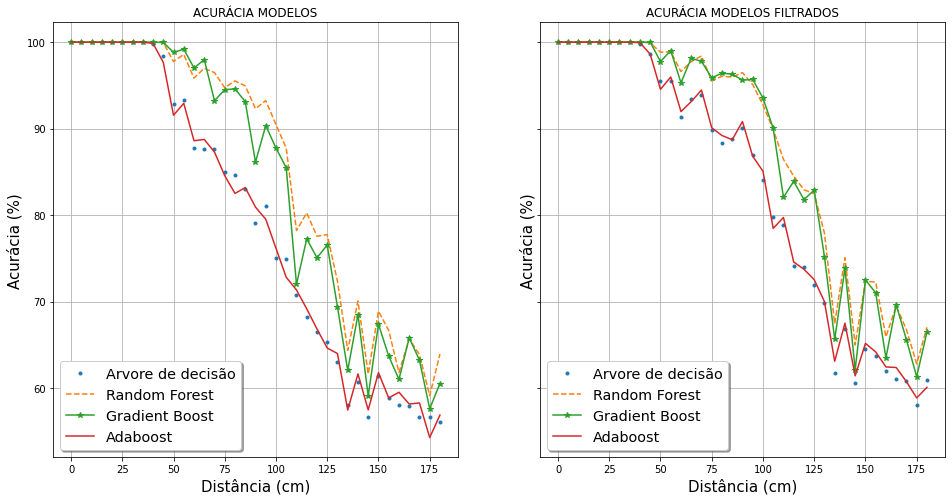

In [ ]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=[16,8], sharey=True)
  
axis[0].plot(distancia,acur_DT, '.', label='Arvore de decisão')
axis[0].plot(distancia,acur_RF, '--', label='Random Forest')
axis[0].plot(distancia,acur_GB, '*-', label='Gradient Boost')
axis[0].plot(distancia,acur_Ada, label='Adaboost')
axis[0].set_title("ACURÁCIA MODELOS")
axis[0].legend(shadow=True, fontsize='x-large')
axis[0].grid(True) 
axis[0].set_xlabel('Distância (cm)', fontsize =15)
axis[0].set_ylabel('Acurácia (%)', fontsize =15)

axis[1].plot(distancia,acur_DT_Gauss,'.', label='Arvore de decisão') 
axis[1].plot(distancia,acur_RF_Gauss,'--', label='Random Forest') 
axis[1].plot(distancia,acur_GB_Gauss,'*-', label='Gradient Boost')
axis[1].plot(distancia,acur_Ada_Gauss, label='Adaboost') 
axis[1].set_title("ACURÁCIA MODELOS FILTRADOS")
axis[1].legend(shadow=True, fontsize='x-large')    
axis[1].grid(True) 
axis[1].set_xlabel('Distância (cm)', fontsize =15)
axis[1].set_ylabel('Acurácia (%)', fontsize =15)
plt.show() 

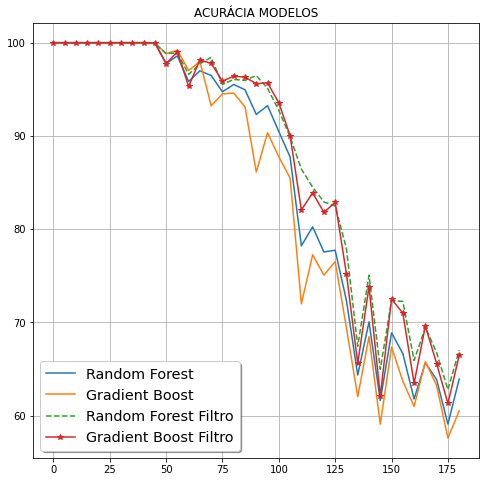

In [ ]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 1, figsize=[8,8])
  
# For Sine Function
axis.plot(distancia,acur_RF, label='Random Forest')
axis.plot(distancia,acur_GB, label='Gradient Boost')
axis.plot(distancia,acur_RF_Gauss,'--', label='Random Forest Filtro') 
axis.plot(distancia,acur_GB_Gauss,'*-', label='Gradient Boost Filtro')
axis.set_title("ACURÁCIA MODELOS")
axis.legend(shadow=True, fontsize='x-large')
axis.grid(True)   
# Combine all the operations and display
plt.show() 

In [ ]:
for i in range(len(distancia)):
  if distancia[i]==100:
    print(acur_RF[i], acur_RF_Gauss[i])
    print(acur_GB[i], acur_GB_Gauss[i])
    print(acur_Ada[i], acur_Ada_Gauss[i])
    print(acur_DT[i], acur_DT_Gauss[i])

90.47138047138047 92.74410774410774
87.76094276094277 93.55218855218855
76.16161616161617 85.08417508417509
75.08417508417509 84.02356902356902


In [ ]:
for i in range(len(distancia)):
  if distancia[i]==70:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==100:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==150:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i])  
    print("----------------")
  if distancia[i]==180:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i]) 

-1.9360269360269342
-4.5454545454545325
----------------
-2.2727272727272663
-5.791245791245785
----------------
-3.468013468013467
-5.1346801346801385
----------------
-3.080808080808083
-5.942760942760941


In [ ]:
for i in range(len(distancia)):
  if distancia[i]==50:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==100:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==150:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])  
    print("----------------")
  if distancia[i]==180:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])  

97.76094276094275 98.83838383838383
98.82154882154882 97.76094276094275
----------------
90.47138047138047 92.74410774410774
87.76094276094277 93.55218855218855
----------------
68.88888888888889 72.35690235690235
67.37373737373737 72.50841750841751
----------------
63.93939393939394 67.02020202020202
60.52188552188552 66.46464646464646
